In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### NaN values

In [5]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## General exploration

In [9]:
had_desease = data.target.sum()
no_desease = len(data) - had_desease

print( had_desease, 'people had a heart desease')
print( no_desease, 'people did not have a heart desease')

526 people had a heart desease
499 people did not have a heart desease


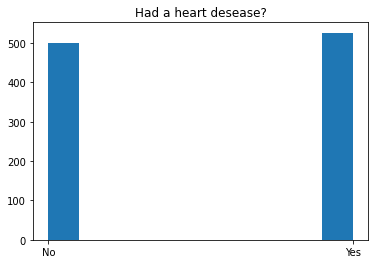

In [10]:
plt.hist(data.target)
plt.title('Had a heart desease?')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

## Data Engineering

The dataset proposes 13 features:

**Age:** a numerical value

**Sex:** it has two values 0 or 1

**Cp:** Cerebral palsy (CP) is a group of disorders that affect a person's ability to move and maintain balance and posture.
        chest pain type (4 values)

**Trestbps:** The person's resting blood pressure

**Chol:** Chol- is a combining form used like a prefix meaning “bile”
          Bile is a yellowish-green liquid secreted by the liver.
          serum cholestoral in mg/dl
          

**Fbs:** fasting blood sugar > 120 mg/dl

**Restecg:** resting electrocardiographic results (values 0,1,2)

**Thalach:** maximum heart rate achieved

**Exang:** exercise induced angina

**Oldpeak:** oldpeak = ST depression induced by exercise relative to rest

**Slope:** the slope of the peak exercise ST segment

**CA:** number of major vessels (0-3) colored by flourosopy

**Thal:** thal: 0 = normal; 1 = fixed defect; 2 = reversable defect



## Analysis

In [11]:
data[['cp', 'target']].groupby('cp').mean().sort_values(by='target', ascending=False)

,target
cp,
1,0.802395
2,0.771127
3,0.662338
0,0.245473


In [12]:
data[['sex', 'target']].groupby('sex').mean().sort_values(by='target', ascending=False)

,target
sex,
0,0.724359
1,0.420757


In [13]:
data[['restecg', 'target']].groupby('restecg').mean().sort_values(by='target', ascending=False)

,target
restecg,
1,0.602339
0,0.430584
2,0.200000


In [14]:
data[['ca', 'target']].groupby('ca').mean().sort_values(by='target', ascending=False)

,target
ca,
4,0.833333
0,0.717993
1,0.292035
2,0.156716
3,0.130435


In [15]:
data[['thal', 'target']].groupby('thal').mean().sort_values(by='target', ascending=False)

,target
thal,
2,0.757353
0,0.428571
1,0.328125
3,0.219512


In [24]:
data[['fbs', 'target']].groupby('fbs').mean().sort_values(by='target', ascending=False)

,target
fbs,
0,0.521789
1,0.464052


### Numerical

C:\Users\shady\venvs\AI_Diploma\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

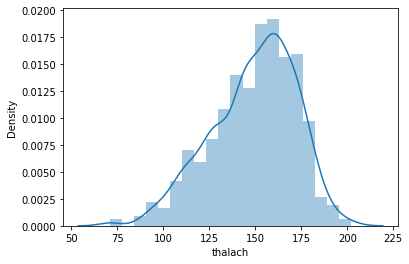

In [25]:
sns.distplot(data.thalach)

C:\Users\shady\venvs\AI_Diploma\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

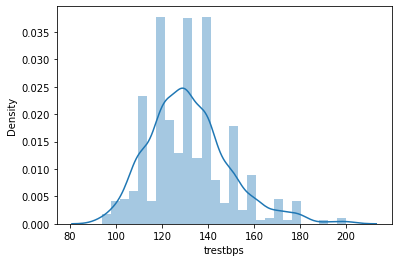

In [19]:
sns.distplot(data.trestbps)

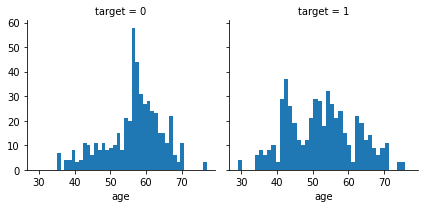

In [22]:
num = sns.FacetGrid(data, col='target')
print(num.map(plt.hist, 'age', bins=40))

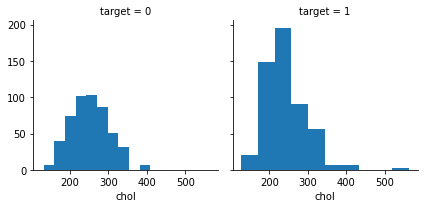

In [26]:
num = sns.FacetGrid(data, col='target')
print(num.map(plt.hist, 'chol', bins=10))